
## Escolha do melhor modelo

Com base nos três gráficos fornecidos, no conjunto de validação o modelo XGBoost foi a melhor escolha. A análise dos gráficos de MAE, R2, e RMSE valida essa decisão.

### Análise dos Gráficos
- MAE_Val (Erro Médio Absoluto): Este gráfico (primeira imagem) mostra que o XGBoost tem o menor valor de MAE (0.5783) em comparação com os outros modelos. O MAE mede o erro médio das previsões do modelo, e um valor menor indica que as previsões estão, em média, mais próximas dos valores reais.

- RMSE_Val (Raiz do Erro Quadrático Médio): Similar ao MAE, o RMSE penaliza erros maiores. O XGBoost também apresenta o menor RMSE (0.7539), como visto no terceiro gráfico. Isso confirma que o modelo não apenas tem um erro médio baixo, mas também não comete erros grandes com frequência.

- R2_Val (Coeficiente de Determinação): O gráfico do R2 (segunda imagem) mostra a proporção da variância na variável dependente que é previsível a partir da(s) variável(is) independente(s). O XGBoost tem o maior valor de R2 (0.9943), muito próximo de 1. Um valor de R2 alto indica que o modelo consegue explicar quase toda a variância dos dados, ou seja, suas previsões são extremamente precisas.

___

In [50]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top5_configuracoes_plotly(json_path, metric='R2_Val'):
    # Carregar dados JSON
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    df = pd.DataFrame(data)

    # Ordenar
    ascending_order = True if metric in ['RMSE_Val', 'MAE_Val'] else False
    df_sorted = df.sort_values(by=metric, ascending=ascending_order).head(5)

    # Melhor config
    best_idx = df_sorted[metric].idxmax() if metric == 'R2_Val' else df_sorted[metric].idxmin()
    df_sorted['Highlight'] = ['Melhor' if idx == best_idx else 'Outros' for idx in df_sorted.index]

    # Colocar configs como string no eixo Y
    df_sorted['Config_Label'] = df_sorted['Configuracao'].apply(lambda x: str(x))

    # Paleta
    palette = {'Melhor': 'lightgreen', 'Outros': 'steelblue'}

    # Gráfico
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df_sorted,
        x=metric,
        y='Config_Label',
        hue='Highlight',
        dodge=False,
        palette=palette
    )

    # Apenas o valor da métrica no meio da barra
    for p, value in zip(ax.patches, df_sorted[metric]):
        ax.annotate(f"{value:.4f}", 
                    (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()/2),
                    ha='center', va='center', color="black", fontsize=10, weight="bold")

    # Ajustes
    plt.title(f"Top 5 Configurações - {df_sorted.iloc[0]['Modelo']} ({metric})")
    plt.xlabel(metric)
    plt.ylabel("")
    plt.legend([],[], frameon=False)

    plt.tight_layout()
    plt.show()


In [51]:
import os
import plotly.express as px

def plot_melhores_modelos(models_dir, metric='R2_Val'):
    """
    Compara a melhor configuração de cada modelo em um único gráfico.
    
    Parâmetros:
    -----------
    models_dir : str
        Caminho da pasta contendo os arquivos JSON.
    metric : str
        Métrica para avaliar a "melhor" configuração. Pode ser 'R2_Val', 'RMSE_Val' ou 'MAE_Val'.
    """
    melhores = []

    # Iterar sobre todos os arquivos JSON
    for file in os.listdir(models_dir):
        if file.endswith('.json'):
            with open(os.path.join(models_dir, file), 'r') as f:
                data = json.load(f)
                df = pd.DataFrame(data)
                
                # Escolher a melhor configuração
                ascending = True if metric in ['RMSE_Val', 'MAE_Val'] else False
                melhor_config = df.sort_values(by=metric, ascending=ascending).iloc[0]
                
                melhores.append({
                    'Modelo': melhor_config['Modelo'],
                    'Config_Label': str(melhor_config['Configuracao']),
                    metric: melhor_config[metric]
                })

    # Criar DataFrame consolidado
    melhores_df = pd.DataFrame(melhores)

    # Gráfico interativo
    fig = px.bar(
        melhores_df,
        x=metric,
        y='Modelo',
        orientation='h',
        text=melhores_df[metric].round(4),
        color='Modelo',
        hover_data=['Config_Label'],
        title=f'Melhor configuração por modelo ({metric})'
    )

    fig.update_traces(textposition='outside')
    fig.update_layout(
        xaxis_title=metric,
        yaxis_title='Modelos',
        width=1000,
        showlegend=False
    )
    
    fig.show()

In [52]:
# Comparar os modelos usando R²
plot_melhores_modelos('../data/models_results', metric='R2_Val')

# Comparar os modelos usando RMSE
plot_melhores_modelos('../data/models_results', metric='RMSE_Val')

# Comparar os modelos usando MAE
plot_melhores_modelos('../data/models_results', metric='MAE_Val')

![Imagem 2](images/r2models.png)
![Imagem 1](images/maemodels.png)
![Imagem 3](images/rmsemodels.png)

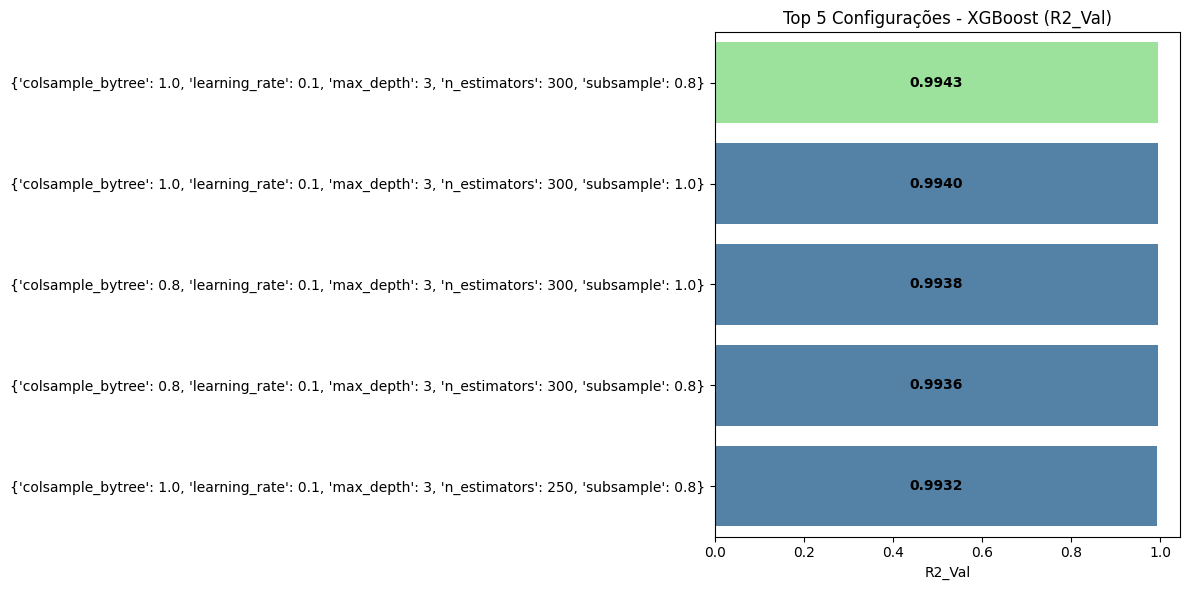

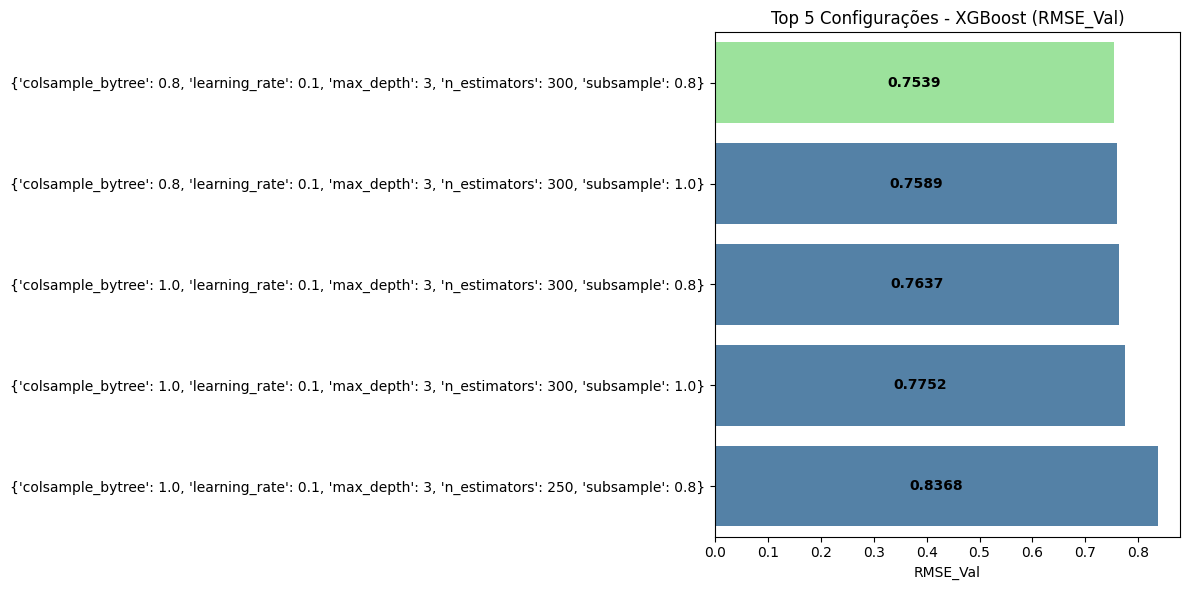

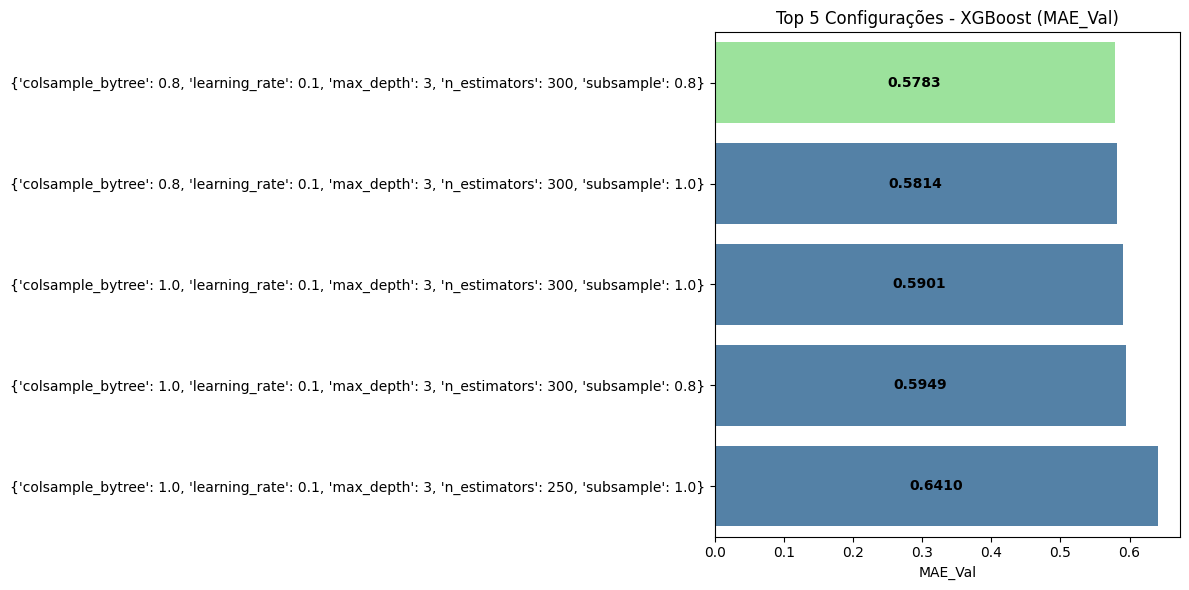

In [53]:
plot_top5_configuracoes_plotly('../data/models_results/XGBoost.json', metric='R2_Val')
plot_top5_configuracoes_plotly('../data/models_results/XGBoost.json', metric='RMSE_Val')
plot_top5_configuracoes_plotly('../data/models_results/XGBoost.json', metric='MAE_Val')

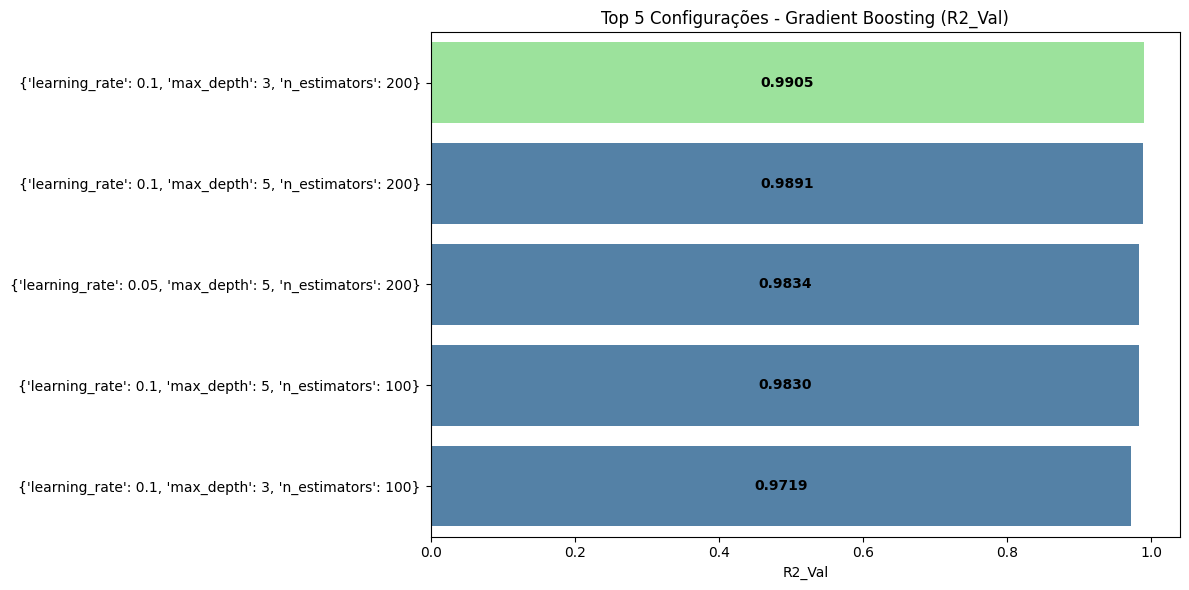

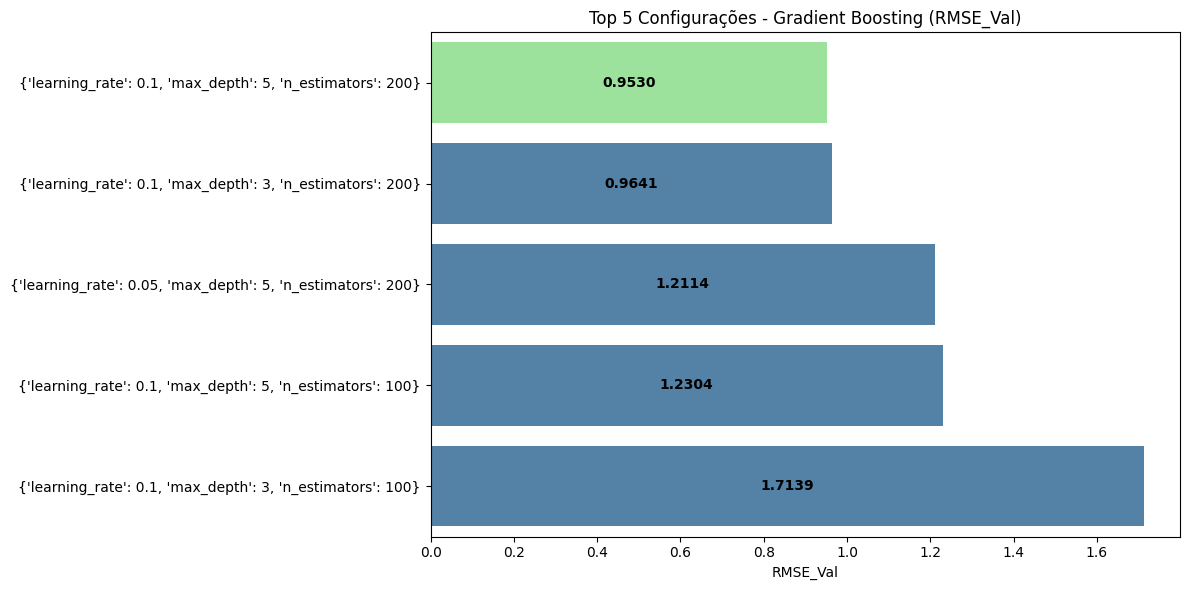

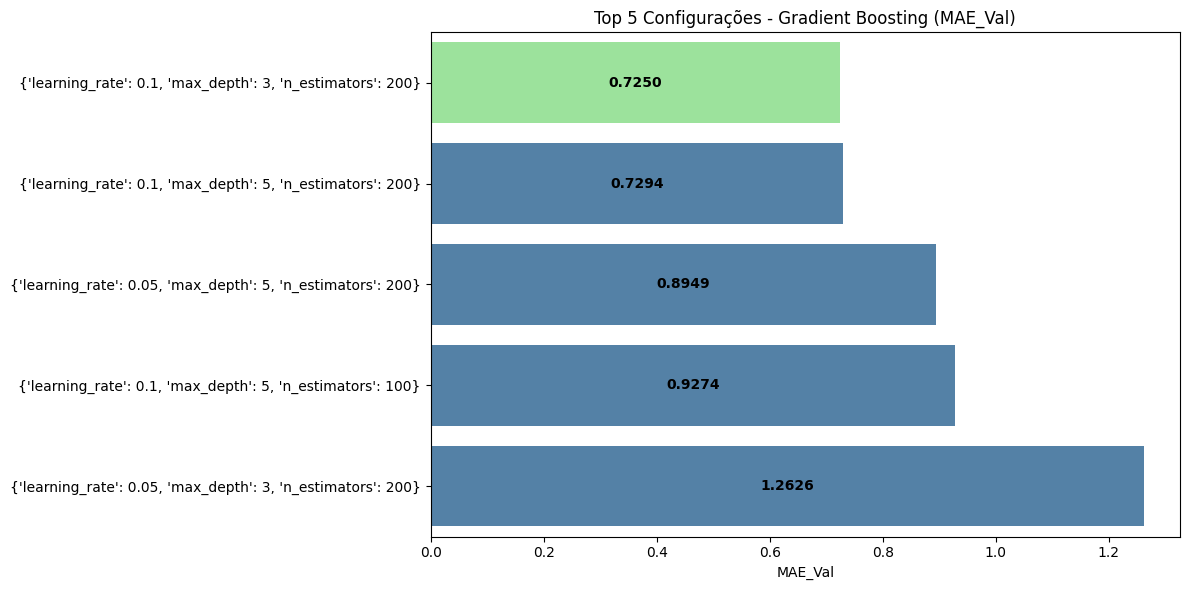

In [54]:
plot_top5_configuracoes_plotly('../data/models_results/Gradient Boosting.json', metric='R2_Val')
plot_top5_configuracoes_plotly('../data/models_results/Gradient Boosting.json', metric='RMSE_Val')
plot_top5_configuracoes_plotly('../data/models_results/Gradient Boosting.json', metric='MAE_Val')

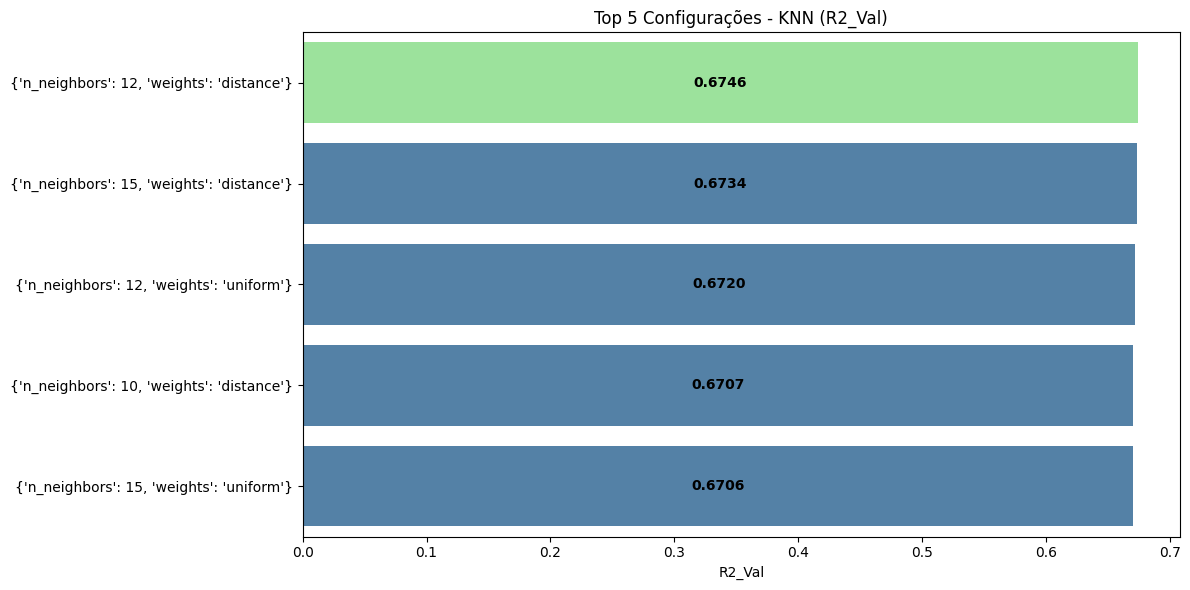

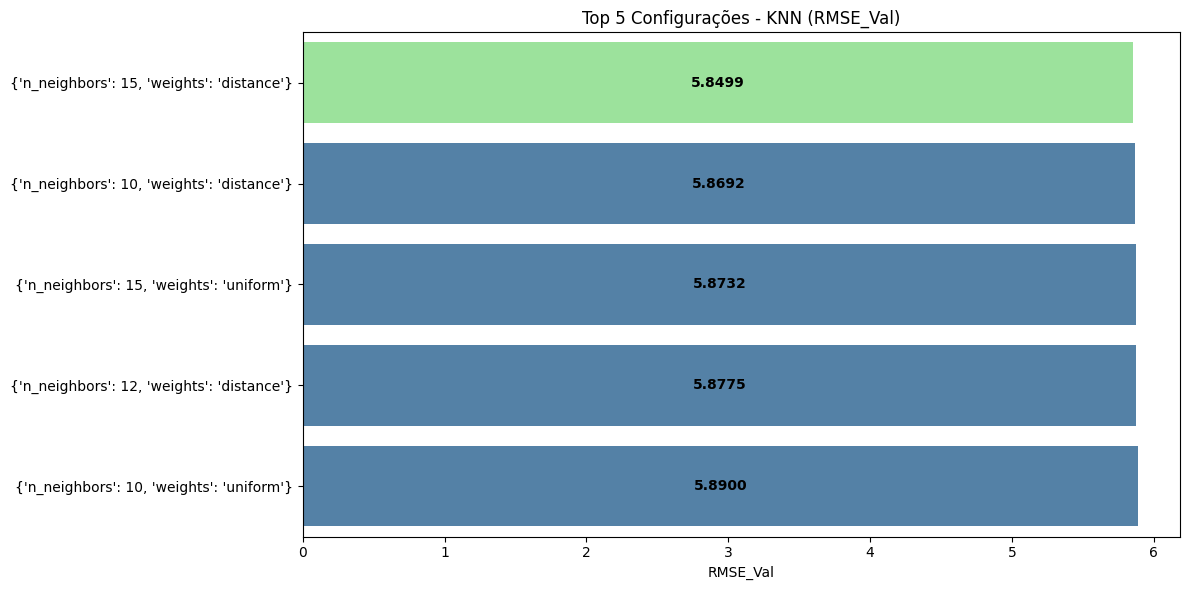

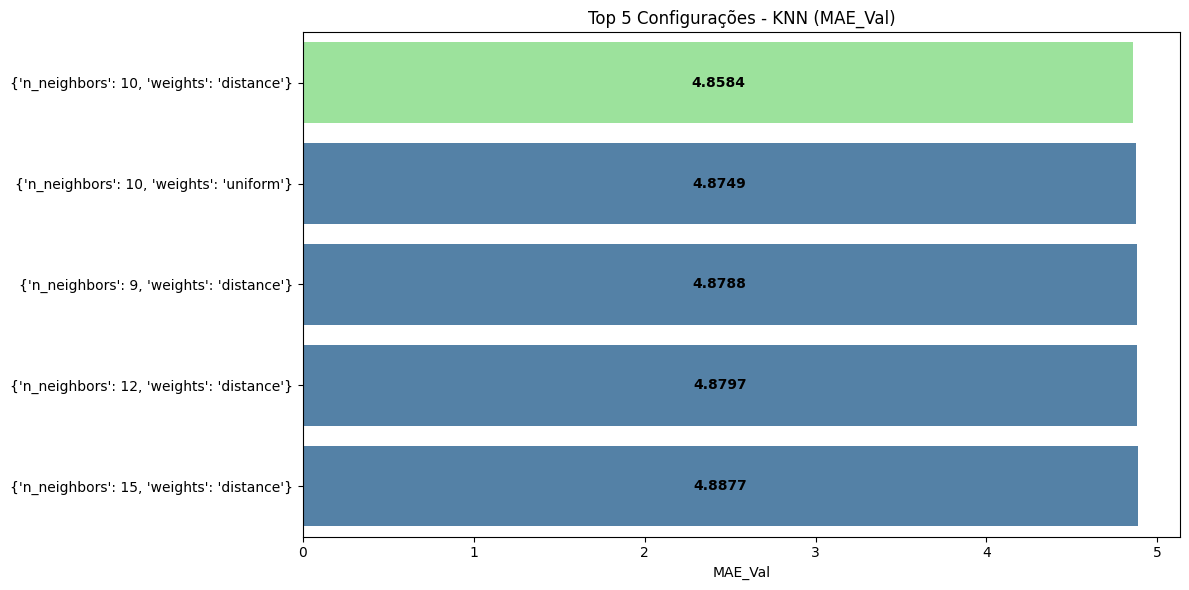

In [55]:
plot_top5_configuracoes_plotly('../data/models_results/KNN.json', metric='R2_Val')
plot_top5_configuracoes_plotly('../data/models_results/KNN.json', metric='RMSE_Val')
plot_top5_configuracoes_plotly('../data/models_results/KNN.json', metric='MAE_Val')

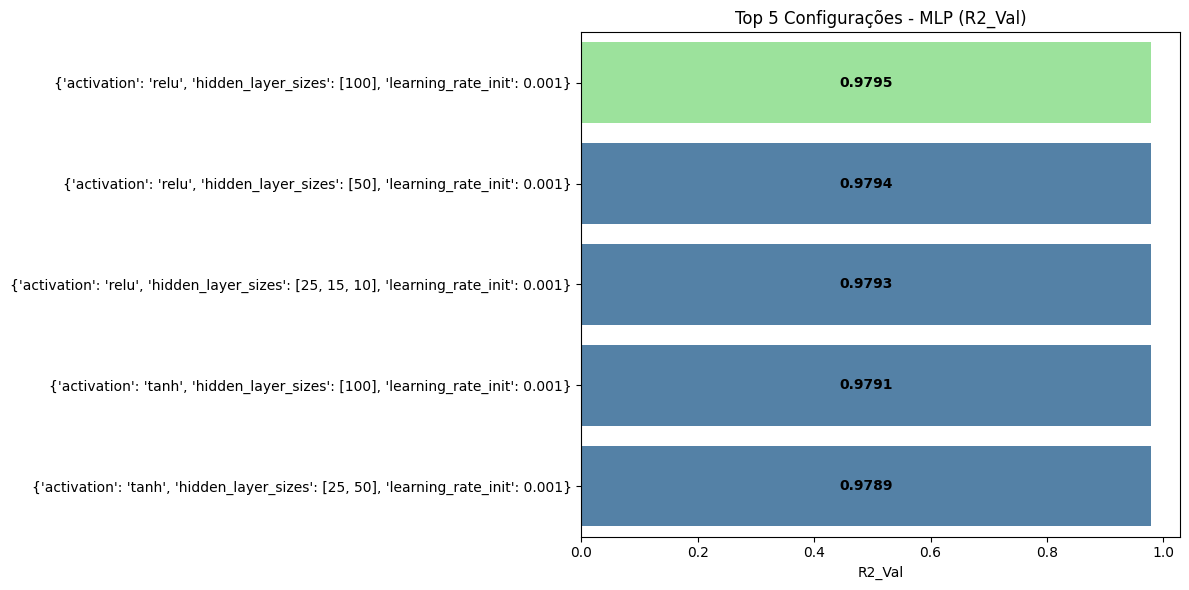

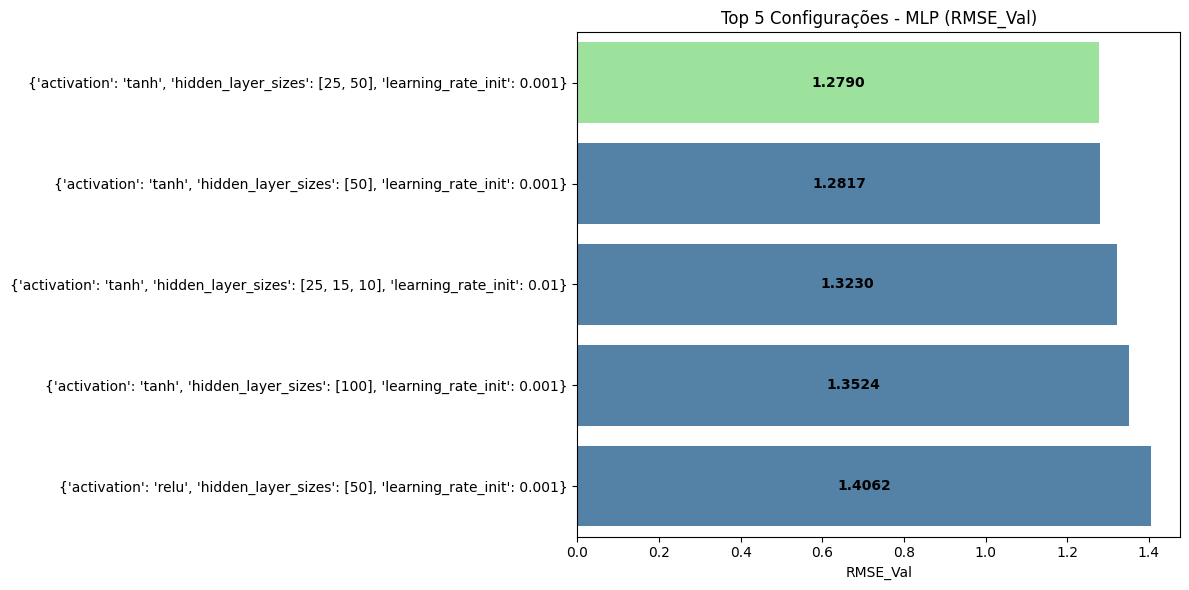

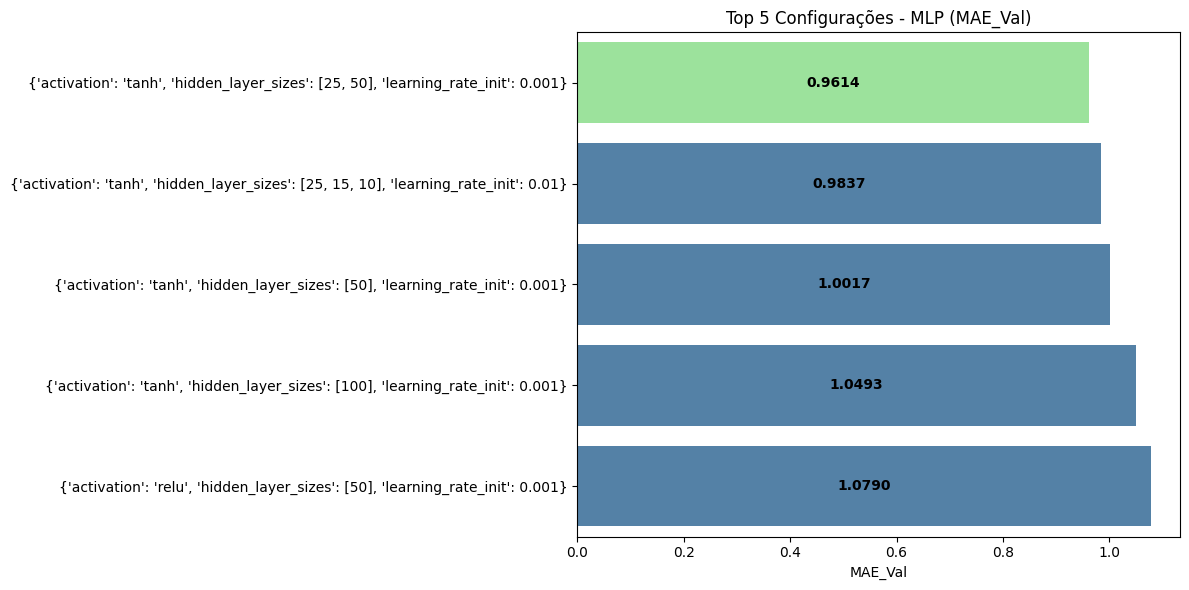

In [56]:
plot_top5_configuracoes_plotly('../data/models_results/MLP.json', metric='R2_Val')
plot_top5_configuracoes_plotly('../data/models_results/MLP.json', metric='RMSE_Val')
plot_top5_configuracoes_plotly('../data/models_results/MLP.json', metric='MAE_Val')

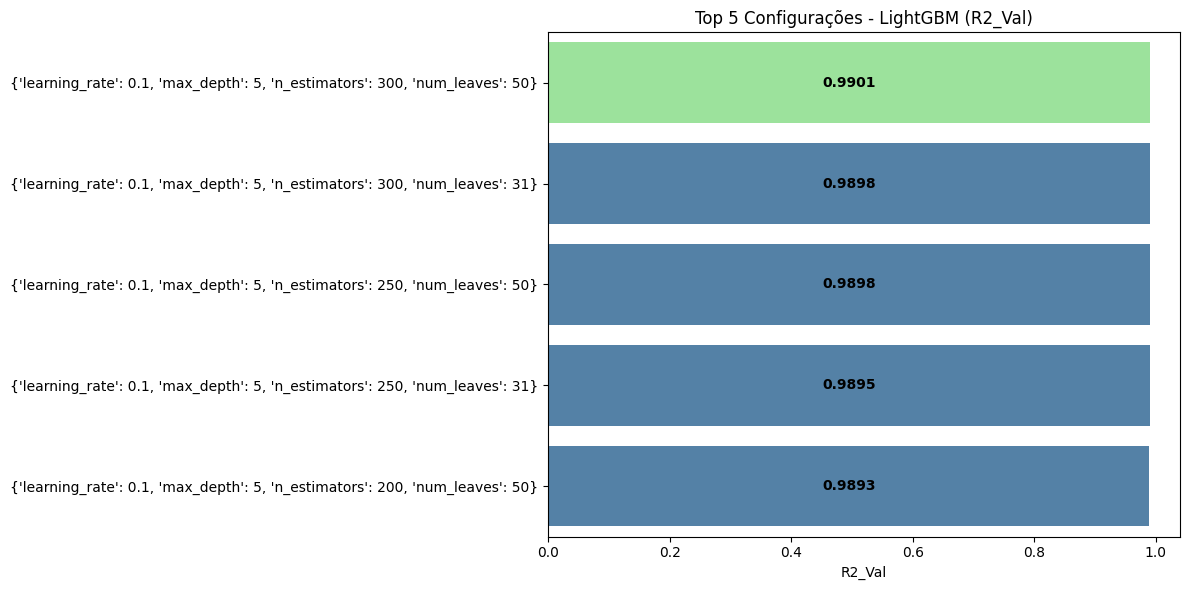

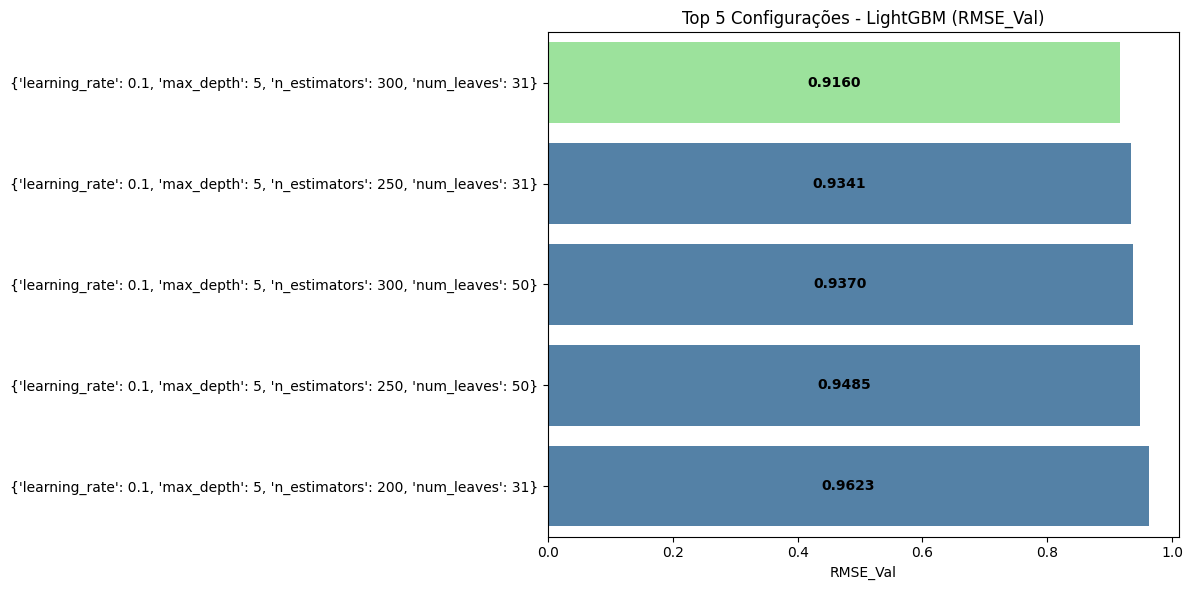

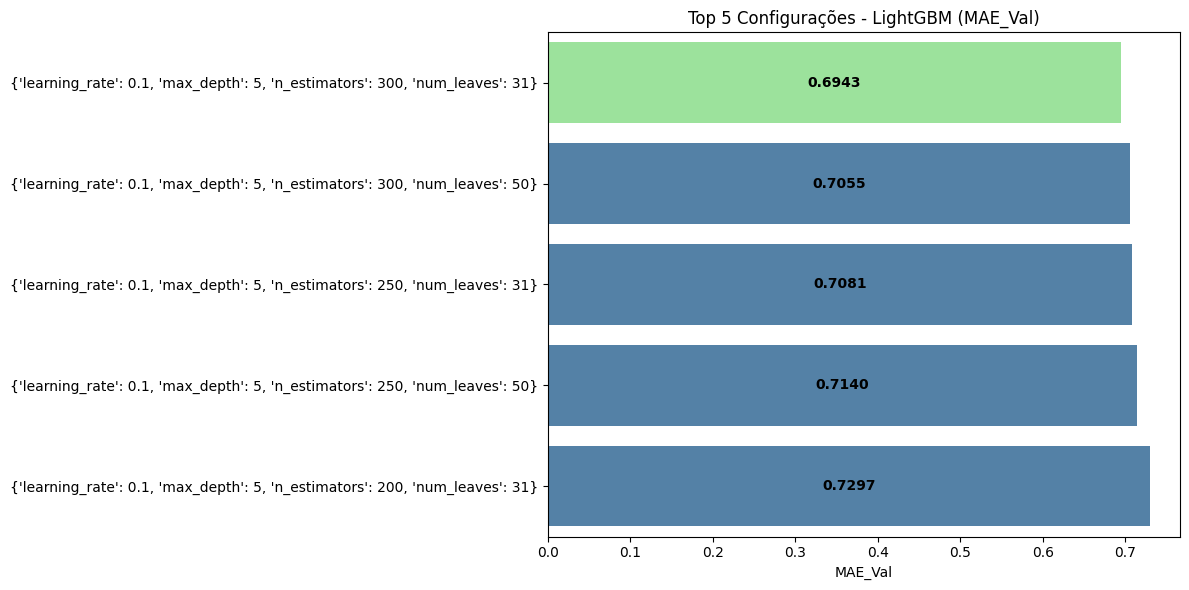

In [57]:
plot_top5_configuracoes_plotly('../data/models_results/LightGBM.json', metric='R2_Val')
plot_top5_configuracoes_plotly('../data/models_results/LightGBM.json', metric='RMSE_Val')
plot_top5_configuracoes_plotly('../data/models_results/LightGBM.json', metric='MAE_Val')

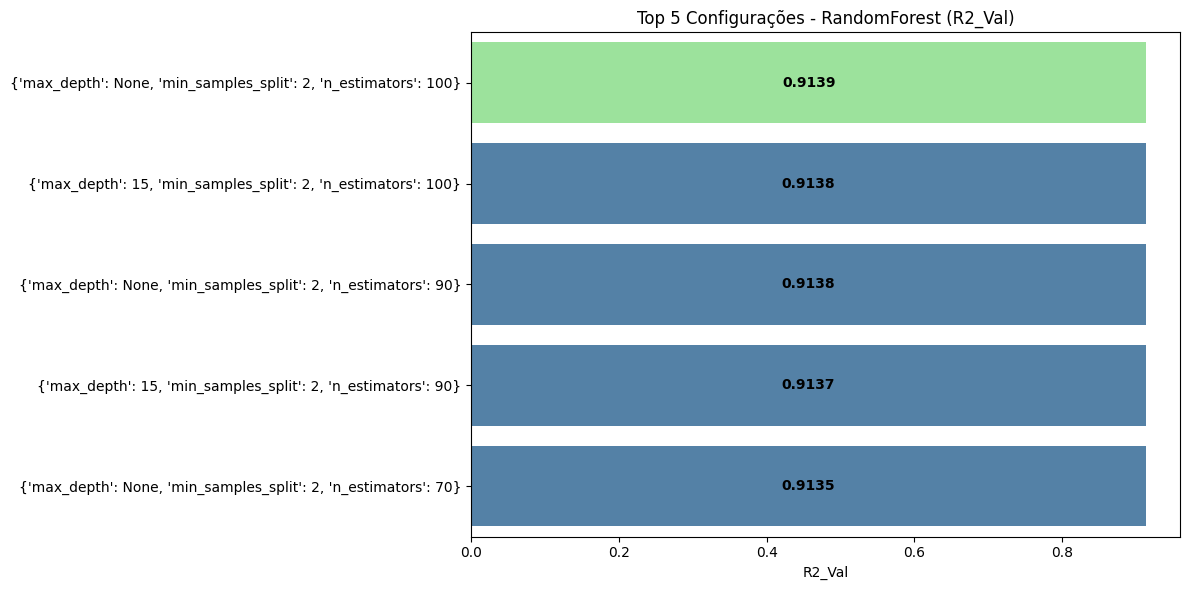

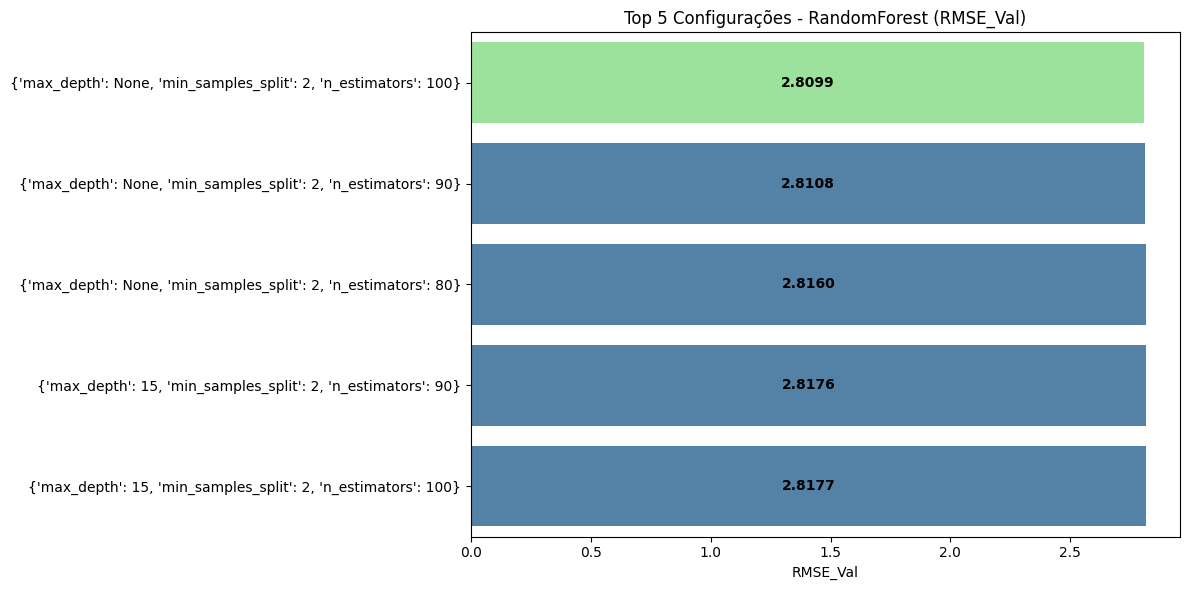

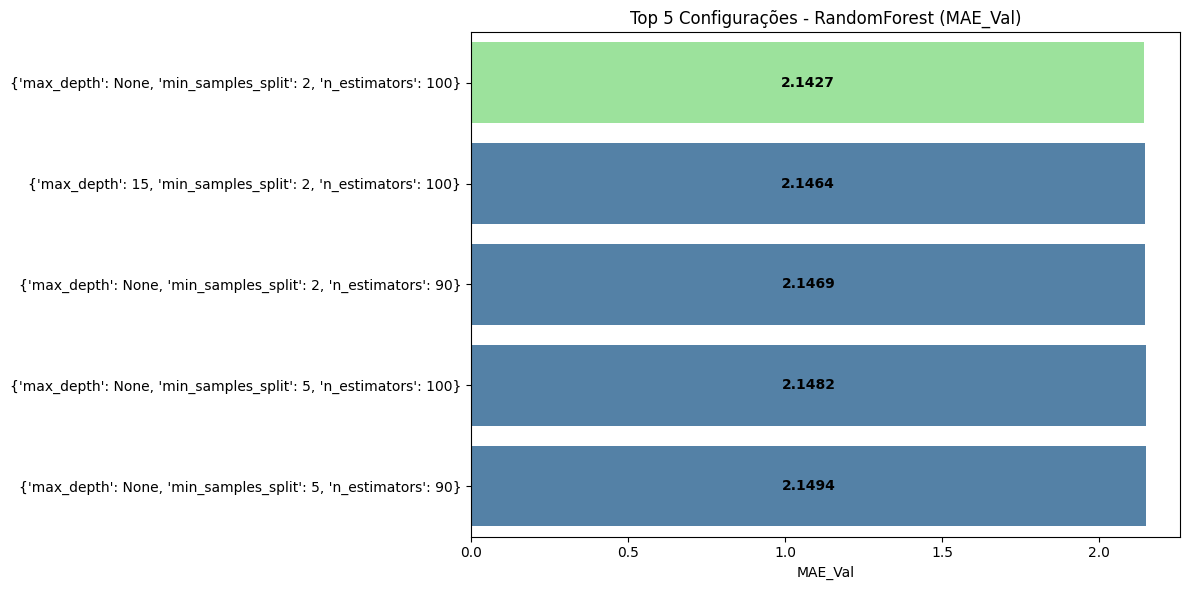

In [58]:
plot_top5_configuracoes_plotly('../data/models_results/RandomForest.json', metric='R2_Val')
plot_top5_configuracoes_plotly('../data/models_results/RandomForest.json', metric='RMSE_Val')
plot_top5_configuracoes_plotly('../data/models_results/RandomForest.json', metric='MAE_Val')